In [101]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from latex import set_size



plt.style.use("tex")
sns.set_palette("colorblind")

datadir = "../data/"
figdir = "../figures/"

R = np.sqrt(9.81*700)/1e-4

In [104]:
initial = xr.open_dataset(datadir + "H_init_cond.nc")
initial

<xarray.Dataset>
Dimensions:  (x: 200, y: 250)
Coordinates:
  * x        (x) float64 2.5e+04 7.5e+04 1.25e+05 ... 9.925e+06 9.975e+06
  * y        (y) float64 -4.975e+06 -4.925e+06 ... 4.719e-89 5.474e-89
Data variables:
    h0       (y, x) float32 ...
Attributes:
    About:    Created by StVenant shallow water model. Laurent Brodeau, 2013

In [105]:
data = xr.open_dataset(datadir + "h_atlantic.nc")
data

<xarray.Dataset>
Dimensions:  (time: 377, x: 200, y: 200)
Coordinates:
  * x        (x) float64 2.5e+04 7.5e+04 1.25e+05 ... 9.925e+06 9.975e+06
  * y        (y) float64 -4.975e+06 -4.925e+06 ... 4.925e+06 4.975e+06
  * time     (time) float64 0.0 4.0 8.0 12.0 16.0 20.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    h        (time, y, x) float32 ...
Attributes:
    About:    Created by StVenant shallow water model. Laurent Brodeau, 2013

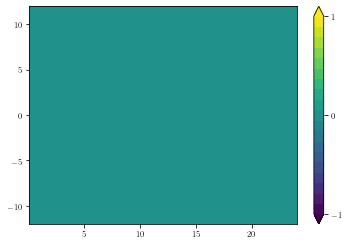

In [65]:
final = data.isel(time=150)

levels = np.linspace(-1, 1, 20)
levels1=[levels[0], 0, levels[-1]]

fig, ax = plt.subplots(1, 1)
c = ax.contourf(final.x/R, final.y/R, final.h*10,
            levels=levels,
            extend="both")
fig.colorbar(c, ticks=levels1)


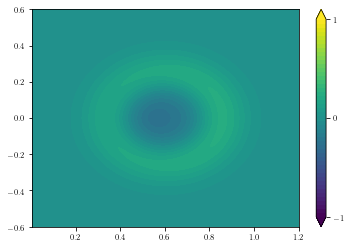

In [21]:
Nt = 50

x = data.x
y = data.y
z = data.h

levels = np.linspace(-1, 1, Nt)
levels1=[levels[0], 0, levels[-1]]

fig, ax = plt.subplots(1, 1)
#ax.set_ylim(0, max(data.y)/4)

cont = plt.contourf(x/R, y/R, data.h.isel(time=0),
                    levels=levels,
                    #cmap=plt.get_cmap("coolwarm"),
                    extend="both"
                   )
plt.colorbar(ticks=levels1)

def animate(i):
    global cont
    z = data.h.isel(time=i)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x/R, y/R, z,
                        levels=levels,
                        #cmap=plt.get_cmap("coolwarm"),
                        extend="both"
                       )
    #plt.title('t = %i:  %.2f' % (i,z[5,5]))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, repeat=False)
anim.save(figdir + "kelvin_atlantic.mp4", writer=animation.FFMpegWriter())

Text(0, 0.5, 'time $\\,$ [s]')

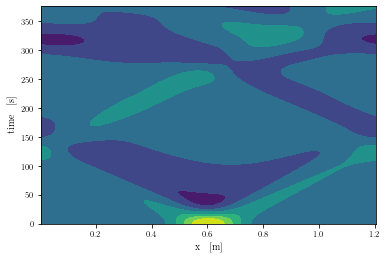

In [22]:
eq = data.sel(y=0, method="nearest")

fig, ax = plt.subplots(1, 1)

ax.contourf(eq.x/R, eq.time, eq.h)
#ax.invert_yaxis()
ax.set_xlabel(r"x $\,$ [m]")
ax.set_ylabel(r"time $\,$ [s]")